In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
import nltk
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from tensorflow import keras
import spacy
import yake

In [2]:
resume = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
resume.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
resume['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [5]:
resume.shape

(962, 2)

In [6]:
l = []

In [7]:
import random
import string

In [8]:
for i in range(962):
    letters = string.ascii_letters
    username = []
    for i in range(random.randint(4,8)):
        name = random.choice(letters)
        username.append(name)
    l.append(''.join(username))

In [9]:
resume['Name'] = l

In [10]:
print(resume['Resume'].iloc[6])

Skills â¢ Python â¢ Tableau â¢ Data Visualization â¢ R Studio â¢ Machine Learning â¢ Statistics IABAC Certified Data Scientist with versatile experience over 1+ years in managing business, data science consulting and leading innovation projects, bringing business ideas to working real world solutions. Being a strong advocator of augmented era, where human capabilities are enhanced by machines, Fahed is passionate about bringing business concepts in area of machine learning, AI, robotics etc., to real life solutions.Education Details 
January 2017 B. Tech Computer Science & Engineering Mohali, Punjab Indo Global College of Engineering
Data Science Consultant 

Data Science Consultant - Datamites
Skill Details 
MACHINE LEARNING- Exprience - 13 months
PYTHON- Exprience - 24 months
SOLUTIONS- Exprience - 24 months
DATA SCIENCE- Exprience - 24 months
DATA VISUALIZATION- Exprience - 24 months
Tableau- Exprience - 24 monthsCompany Details 
company - Datamites
description - â¢ Analyzed 

In [ ]:
training_data['new_text'] = training_data['new_text'].apply(lambda x:lemm.lemmatize(x))

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
def remove_stopwords(text):
    no_stop = []
    for word in text.split(' '):
        if word not in stop_words:
            no_stop.append(word)
    return " ".join(no_stop)

In [ ]:
training_data['new_text'] = training_data['new_text'].apply(remove_stopwords)

In [ ]:
def clean_text(text):
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'https?://[^\s\n\r]+', '', text)
    text = re.sub(r'#', '', text)
    return text

In [12]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [13]:
resume['cleaned_resume'] = resume['Resume'].apply(cleanResume)

In [14]:
resume.head(5)

,Category,Resume,Name,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,fasyTGRE,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,PRzxvGVq,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",bWkaVVE,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,vieT,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",sdWy,Education Details MCA YMCAUST Faridabad Haryan...


In [41]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume[i] = le.fit_transform(resume[i])

In [45]:
resume['Category'].nunique()

25

In [103]:
def main_keywords(text):
    language = "en"
    max_ngram_size = 4
    deduplication_threshold = 0.9
    numOfKeywords = 25
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)
    key_word = []
    for kw in keywords:
        key_word.append(kw[0])
    return key_word

In [107]:
def main_scores(text):
    language = "en"
    max_ngram_size = 4
    deduplication_threshold = 0.9
    numOfKeywords = 25
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)
    score = []
    for kw in keywords:
        score.append(kw[1])
    return sum(score)

In [ ]:
resume['score'] = resume['cleaned_resume'].apply(main_scores)

In [15]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


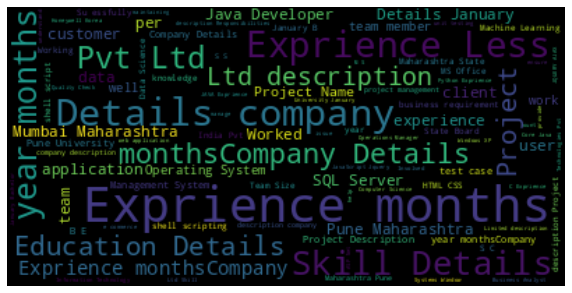

In [17]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud")

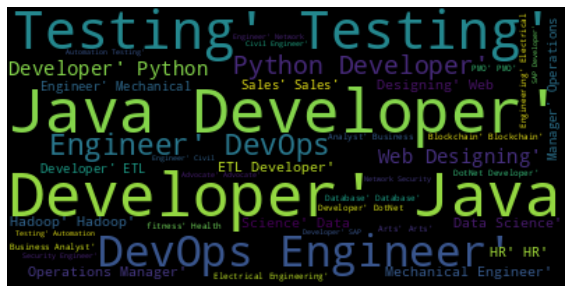

In [21]:
wc = WordCloud().generate(str(resume['Category'].values))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud")

In [22]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume[i] = le.fit_transform(resume[i])

In [26]:
requiredText = resume['cleaned_resume'].values
requiredTarget = resume['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(769, 1500)
(193, 1500)


In [30]:
requiredText = resume['cleaned_resume'].values
requiredTarget = resume['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [32]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()    
}

In [39]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [40]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
************************************************************
all models trained


In [41]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9856957087126138
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.9792746113989638
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 0.9986996098829649
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.9896373056994818
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.9948186528497409
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForest

In [42]:
final_model = RandomForestClassifier()

In [43]:
final_model.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
pred_score = final_model.predict(X_test)

In [48]:
print(classification_report(pred_score,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       0.91      1.00      0.95        10
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         8
          17       1.00    

In [49]:
import pickle

In [50]:
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))